## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset and basic preprocessing

In [2]:
brakepads = pd.read_csv("data.csv")
print(brakepads.shape)
brakepads.dropna(subset=['classOfPart'], how='any', inplace=True)
print(brakepads.shape)
brakepads.dropna(thresh=4, inplace=True)
print(brakepads.shape)
brakepads[['classOfPart']].astype('category')
print(brakepads.shape)

(4001, 5)
(1440, 5)
(1275, 5)
(1275, 5)


In [3]:
brakepads.isnull().sum()

partNumber       0
classOfPart      0
length         232
width          768
thickness        0
dtype: int64

In [4]:
brakepads.dtypes

partNumber      object
classOfPart     object
length          object
width          float64
thickness      float64
dtype: object

## Replacing the null values in length by mean

In [5]:
brakepads['length']=brakepads['length'].astype('float')
brakepads['length'] = (brakepads['length'].fillna(brakepads.groupby('classOfPart')['length'].transform('mean')).astype(float))

## Replacing the null values in width by mean

In [6]:
brakepads['width']=brakepads['width'].astype('float')
brakepads['width'] = (brakepads['width'].fillna(brakepads.groupby('classOfPart')['width'].transform('mean')).astype(float))

In [7]:
brakepads.isnull().sum()

partNumber     0
classOfPart    0
length         0
width          0
thickness      0
dtype: int64

In [8]:
brakepads.replace({'Hinterachse': 0, 'Vorderachse': 1}, inplace=True)

## Visualizing the dataset(with outliers)

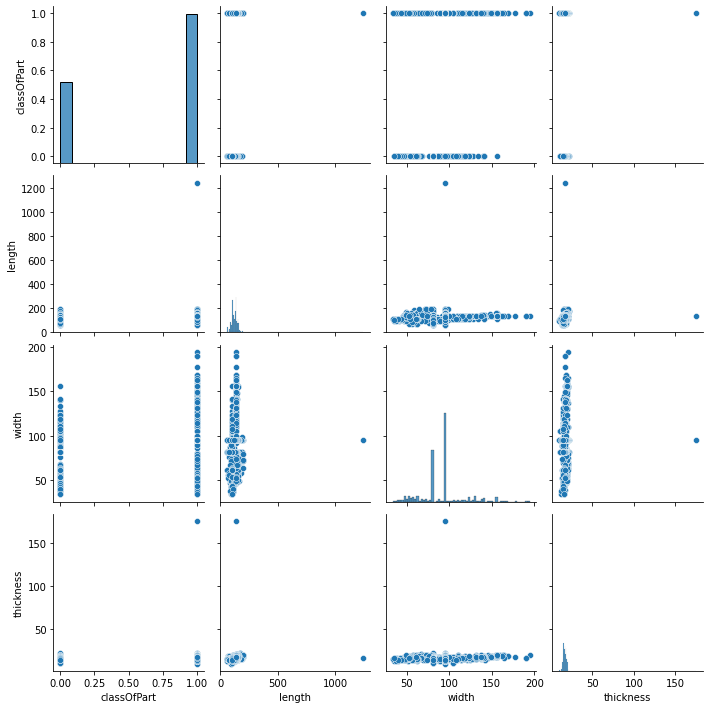

In [9]:
import seaborn as sns
sns.pairplot(brakepads)

In [10]:
X_lw = brakepads.iloc[:, [2,3]].values
X_lt = brakepads.iloc[:, [2,4]].values
X_wt = brakepads.iloc[:, [3,4]].values

## Elbow method for length-width clusters(with outliers)

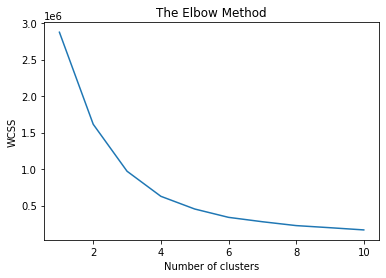

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_lw)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_lw)

## Visualizing the clusters for length-width(with outliers)

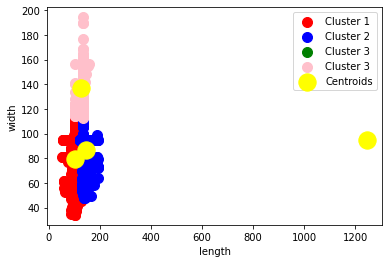

In [13]:
plt.scatter(X_lw[y_kmeans == 0, 0], X_lw[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_lw[y_kmeans == 1, 0], X_lw[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_lw[y_kmeans == 2, 0], X_lw[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_lw[y_kmeans == 3, 0], X_lw[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()
plt.show()

## Elbow method for length-thickness clusters(with outliers)

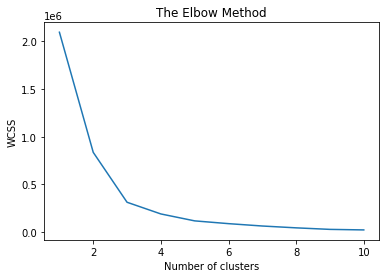

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_lt)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_lt)

## Visualizing the clusters for length-thickness(with outliers)

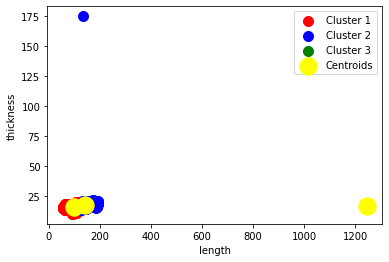

In [16]:
plt.scatter(X_lt[y_kmeans == 0, 0], X_lt[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_lt[y_kmeans == 1, 0], X_lt[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_lt[y_kmeans == 2, 0], X_lt[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('length')
plt.ylabel('thickness')
plt.legend()
plt.show()

## Elbow method for width-thickness clusters(with outliers)

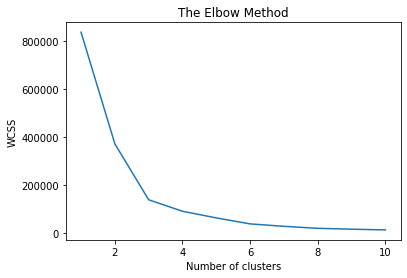

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_wt)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_wt)

## Visualizing the clusters for width-thickness(with outliers)

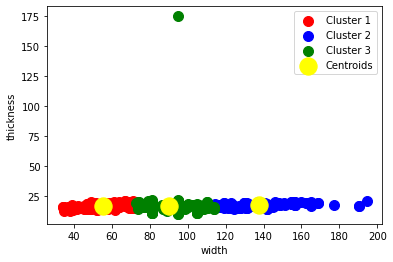

In [19]:
plt.scatter(X_wt[y_kmeans == 0, 0], X_wt[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_wt[y_kmeans == 1, 0], X_wt[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_wt[y_kmeans == 2, 0], X_wt[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('width')
plt.ylabel('thickness')
plt.legend()
plt.show()

## Dataset without outliers

In [20]:
bp1 = brakepads.copy()

In [21]:
bp1.head()

,partNumber,classOfPart,length,width,thickness
0,402B0788,0,108.700000,81.241265,14.0
5,402B0041,0,103.368544,93.100000,16.0
10,402B0030,0,107.800000,81.241265,12.9
11,402B0462,0,103.368544,53.800000,15.4
15,402B0055,0,95.000000,81.241265,15.8


In [22]:
bp1['length']=bp1['length'].astype('float')
bp1.drop(bp1[(bp1['length']>400) | (bp1['width']>180) | (bp1['thickness']>150)].index, inplace=True)

In [23]:
bp1.head()

,partNumber,classOfPart,length,width,thickness
0,402B0788,0,108.700000,81.241265,14.0
5,402B0041,0,103.368544,93.100000,16.0
10,402B0030,0,107.800000,81.241265,12.9
11,402B0462,0,103.368544,53.800000,15.4
15,402B0055,0,95.000000,81.241265,15.8


In [24]:
bp1['length'] = (bp1['length'].fillna(bp1.groupby('classOfPart')['length'].transform('mean')).astype(float))
bp1['width'] = (bp1['width'].fillna(bp1.groupby('classOfPart')['width'].transform('mean')).astype(float))

In [25]:
bp1.isnull().sum()

partNumber     0
classOfPart    0
length         0
width          0
thickness      0
dtype: int64

In [26]:
bp1.replace({'Hinterachse': 0, 'Vorderachse': 1}, inplace=True)

##  Visualisation of dataset (without outliers)

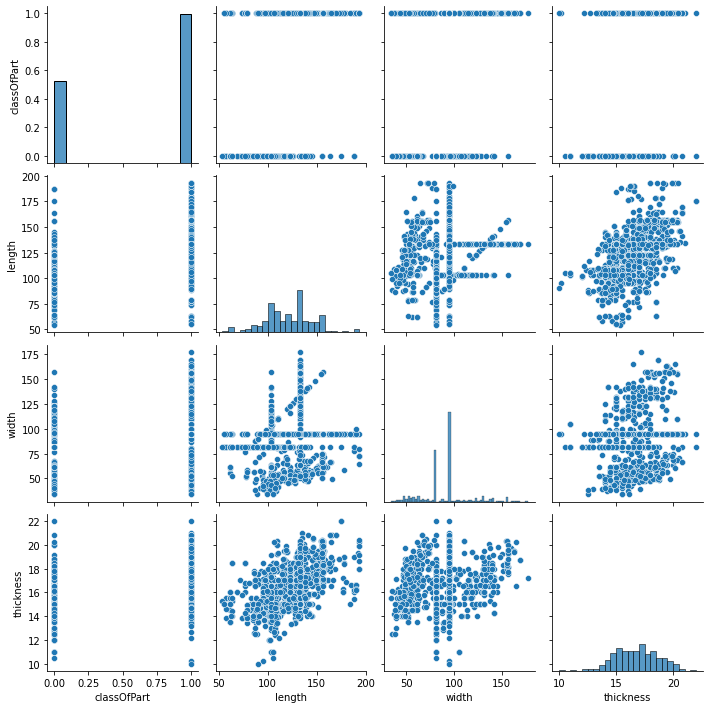

In [27]:
import seaborn as sns
sns.pairplot(bp1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


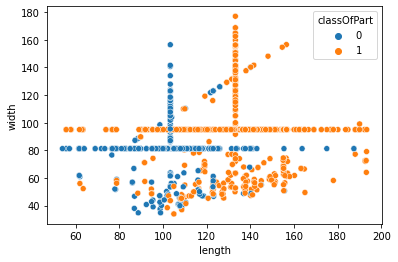

In [28]:
sns.scatterplot(bp1['length'],bp1['width'],hue=brakepads['classOfPart'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


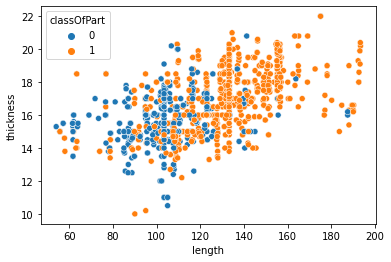

In [29]:
sns.scatterplot(bp1['length'],bp1['thickness'],hue=brakepads['classOfPart'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


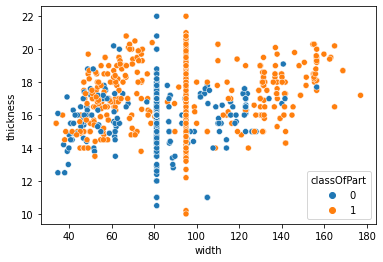

In [30]:
sns.scatterplot(bp1['width'],bp1['thickness'],hue=brakepads['classOfPart'])

In [31]:
X_lw1 = bp1.iloc[:, [2,3]].values
X_lt1 = bp1.iloc[:, [2,4]].values
X_wt1 = bp1.iloc[:, [3,4]].values

## Elbow method for length-width clusters(without outliers)

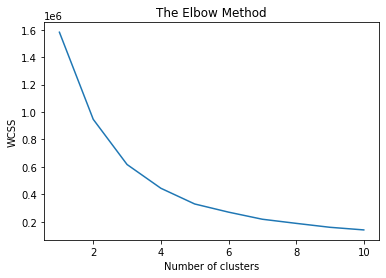

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_lw1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_lw1)

## Visualizing the clusters for length-width(without outliers)

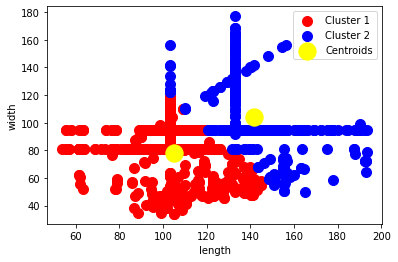

In [34]:
plt.scatter(X_lw1[y_kmeans == 0, 0], X_lw1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_lw1[y_kmeans == 1, 0], X_lw1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()
plt.show()

## Elbow method for length-thickness clusters(without outliers)

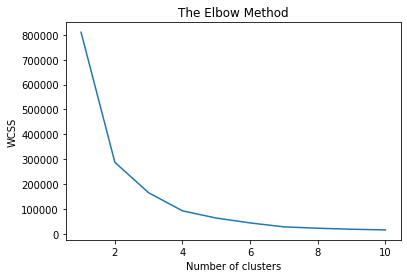

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_lt1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_lt1)

## Visualizing the clusters for length-thickness(without outliers)

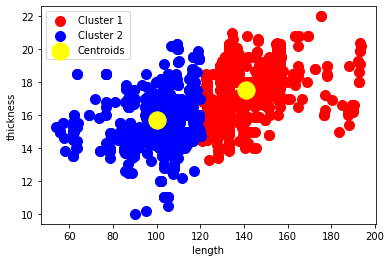

In [37]:
plt.scatter(X_lt1[y_kmeans == 0, 0], X_lt1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_lt1[y_kmeans == 1, 0], X_lt1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('length')
plt.ylabel('thickness')
plt.legend()
plt.show()

## Elbow method for width-thickness clusters(without outliers)

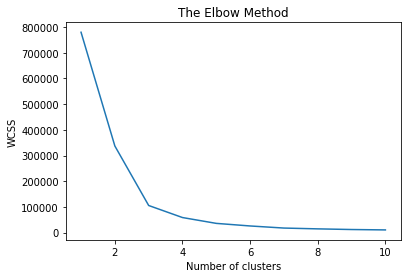

In [38]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_wt1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_wt1)

## Visualizing the clusters for width-thickness(without outliers)

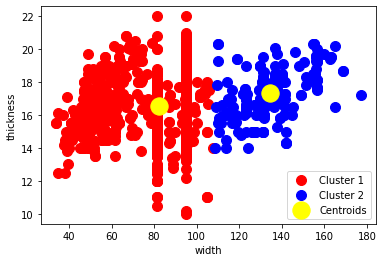

In [40]:
plt.scatter(X_wt1[y_kmeans == 0, 0], X_wt1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_wt1[y_kmeans == 1, 0], X_wt1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('width')
plt.ylabel('thickness')
plt.legend()
plt.show()

## Splitting into train and test sets

In [41]:
from sklearn.model_selection import train_test_split
X = bp1[['length', 'thickness', 'width']]
y = bp1[['classOfPart']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy:  0.8031496062992126
Confusion Matrix: 
[[ 46  46]
 [  4 158]]
F1 Score:  0.8633879781420766
ROC-AUC score:  0.7376543209876543



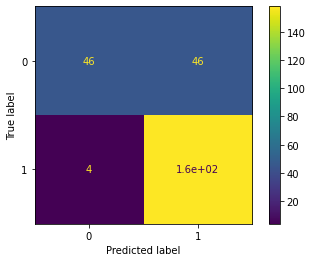

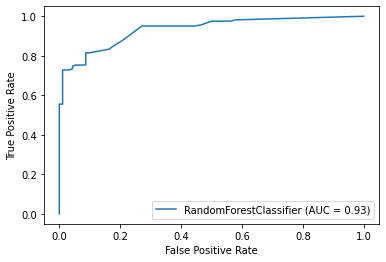

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score
clf = RandomForestClassifier(n_estimators=35, max_depth=1, random_state=42)
clf.fit(X_train, y_train)
pred1=clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred1)) 
print("Confusion Matrix: ")
print(confusion_matrix(y_test,pred1))
print("F1 Score: ", f1_score(y_test,pred1))
print("ROC-AUC score: ", roc_auc_score(y_test,pred1))
print("")
plot_confusion_matrix(clf, X_test, y_test)  
plot_roc_curve(clf, X_test, y_test) 
plt.show()  

## Logistic Regression

Accuracy:  0.7362204724409449
Confusion Matrix: 
[[ 51  41]
 [ 26 136]]
F1 Score:  0.8023598820058997
ROC-AUC score:  0.6969269994632313



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


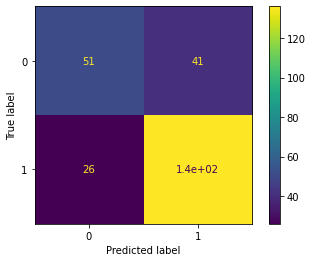

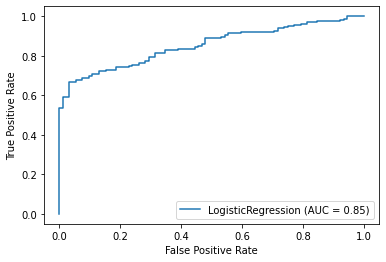

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred2=lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred2))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,pred2))
print("F1 Score: ", f1_score(y_test,pred2))
print("ROC-AUC score: ", roc_auc_score(y_test,pred2))
print("")
plot_confusion_matrix(lr, X_test, y_test)  
plot_roc_curve(lr, X_test, y_test) 
plt.show()  

## KNN Classifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  0.9606299212598425
Confusion Matrix: 
[[ 90   2]
 [  8 154]]
F1 Score:  0.9685534591194969
ROC-AUC score:  0.9644390767579174



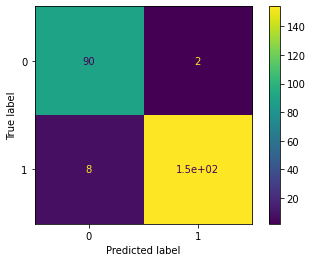

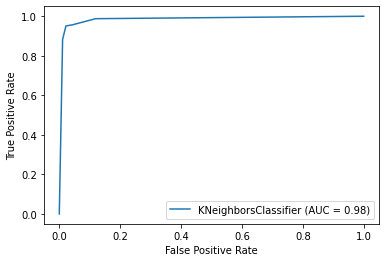

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve, roc_auc_score
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
pred3=knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred3))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,pred3))
print("F1 Score: ", f1_score(y_test,pred3))
print("ROC-AUC score: ", roc_auc_score(y_test,pred3))
print("")
plot_confusion_matrix(knn, X_test, y_test) 
plot_roc_curve(knn, X_test, y_test) 
plt.show()  

## SVM Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.7716535433070866
Confusion Matrix: 
[[ 63  29]
 [ 29 133]]
F1 Score:  0.8209876543209876
ROC-AUC score:  0.7528851315083198



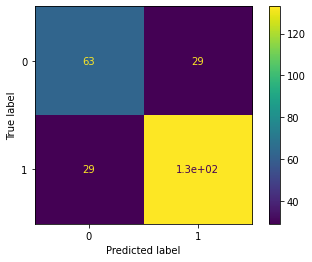

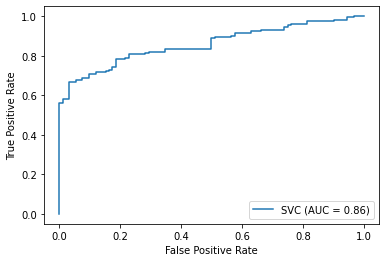

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve, roc_auc_score
svc = SVC(C = 2.0, kernel = 'linear')
svc.fit(X_train,y_train)
pred4=svc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred4))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,pred4))
print("F1 Score: ", f1_score(y_test,pred4))
print("ROC-AUC score: ", roc_auc_score(y_test,pred4))
print("")
plot_confusion_matrix(svc, X_test, y_test)
plot_roc_curve(svc, X_test, y_test) 
plt.show()  

## XGBoost

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9566929133858267
Confusion Matrix: 
[[ 87   5]
 [  6 156]]
F1 Score:  0.9659442724458205
ROC-AUC score:  0.9543075684380031



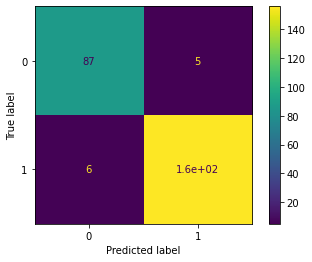

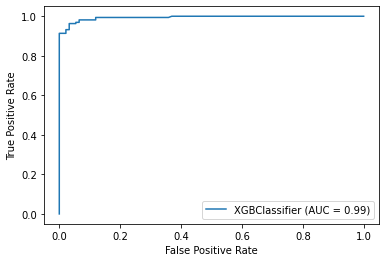

In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=3)
xgb.fit(X_train, y_train)
pred5=xgb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred5))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,pred5))
print("F1 Score: ", f1_score(y_test,pred5))
print("ROC-AUC score: ", roc_auc_score(y_test,pred5))
print("")
plot_confusion_matrix(xgb, X_test, y_test)
plot_roc_curve(xgb, X_test, y_test) 
plt.show()  

## Testing the models on new data

In [46]:
test = pd.read_csv("test.csv")

In [47]:
test.head()

,index,length,thickness,width,classOfPart
0,0,108.700000,14.0,71.728235,Hinterachse
1,1,139.747350,16.0,93.100000,Hinterachse
2,2,107.800000,12.9,77.498078,Hinterachse
3,3,101.067871,15.4,53.800000,Hinterachse
4,4,95.000000,15.8,47.696782,Hinterachse


In [49]:
test.drop(['index'],axis=1,inplace=True)

In [50]:
test.isnull().sum()

length         0
thickness      0
width          0
classOfPart    0
dtype: int64

In [51]:
test.dtypes

length         float64
thickness      float64
width          float64
classOfPart     object
dtype: object

##Visualizing the new dataset

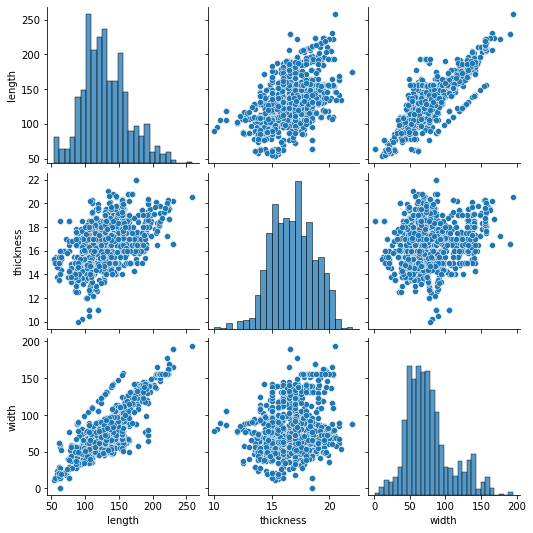

In [52]:
import seaborn as sns
sns.pairplot(test)

In [53]:
test.replace({'Hinterachse': 0, 'Vorderachse': 1}, inplace=True)

In [54]:
X1_test = test[['length','thickness','width']]
y1_test = test[['classOfPart']]

##Random Forest Classifier

Accuracy:  0.7588373919874313
Confusion Matrix: 
[[226 223]
 [ 84 740]]
F1 Score:  0.8282036933407947
ROC-AUC score:  0.7006995048327458



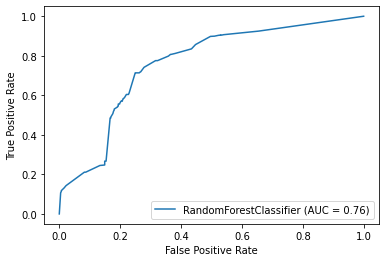

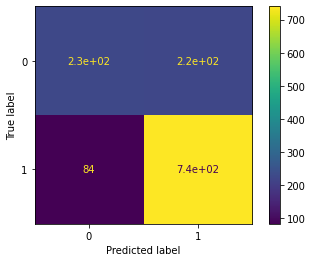

In [73]:
y1 = clf.predict(X1_test)
print("Accuracy: ", accuracy_score(y1_test,y1)) 
print("Confusion Matrix: ")
print(confusion_matrix(y1_test,y1))
print("F1 Score: ", f1_score(y1_test,y1))
print("ROC-AUC score: ", roc_auc_score(y1_test,y1))
print("")
plot_roc_curve(clf, X1_test, y1_test)
plot_confusion_matrix(clf, X1_test, y1_test)  
plt.show() 

##Logistic Regression

Accuracy:  0.7391987431264729
Confusion Matrix: 
[[278 171]
 [161 663]]
F1 Score:  0.7997587454764777
ROC-AUC score:  0.7118826626591995



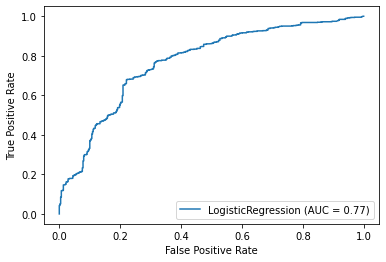

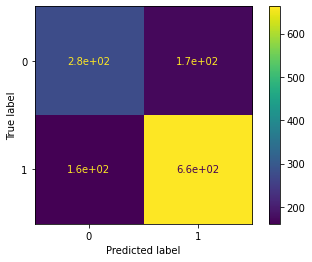

In [74]:
y2 = lr.predict(X1_test)
print("Accuracy: ", accuracy_score(y1_test,y2))
print("Confusion Matrix: ")
print(confusion_matrix(y1_test,y2))
print("F1 Score: ", f1_score(y1_test,y2))
print("ROC-AUC score: ", roc_auc_score(y1_test,y2))
print("")
plot_roc_curve(lr, X1_test, y1_test)
plot_confusion_matrix(lr, X1_test, y1_test)  
plt.show() 

## KNN Classifier

Accuracy:  0.7062058130400628
Confusion Matrix: 
[[315 134]
 [240 584]]
F1 Score:  0.7574578469520105
ROC-AUC score:  0.7051484420611067



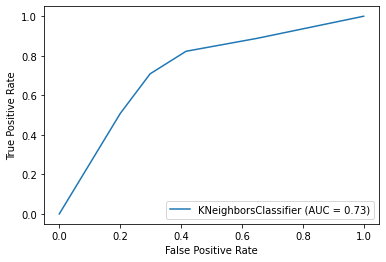

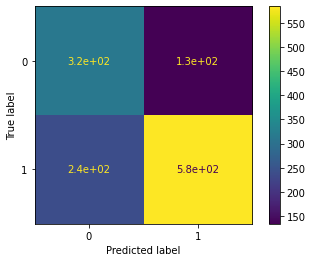

In [75]:
y3 = knn.predict(X1_test)
print("Accuracy: ", accuracy_score(y1_test,y3))
print("Confusion Matrix: ")
print(confusion_matrix(y1_test,y3))
print("F1 Score: ", f1_score(y1_test,y3))
print("ROC-AUC score: ", roc_auc_score(y1_test,y3))
print("")
plot_roc_curve(knn, X1_test, y1_test)
plot_confusion_matrix(knn, X1_test, y1_test)  
plt.show() 

##SVM Classifier

Accuracy:  0.7407698350353495
Confusion Matrix: 
[[285 164]
 [166 658]]
F1 Score:  0.7995139732685298
ROC-AUC score:  0.7166437822993925



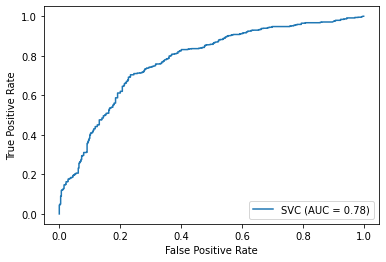

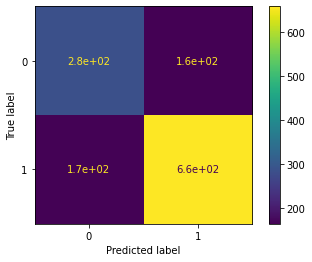

In [76]:
y4 = svc.predict(X1_test)
print("Accuracy: ", accuracy_score(y1_test,y4))
print("Confusion Matrix: ")
print(confusion_matrix(y1_test,y4))
print("F1 Score: ", f1_score(y1_test,y4))
print("ROC-AUC score: ", roc_auc_score(y1_test,y4))
print("")
plot_roc_curve(svc, X1_test, y1_test)
plot_confusion_matrix(svc, X1_test, y1_test)   
plt.show() 

##XGBoost

Accuracy:  0.7360565593087196
Confusion Matrix: 
[[273 176]
 [160 664]]
F1 Score:  0.7980769230769231
ROC-AUC score:  0.7069215300451922



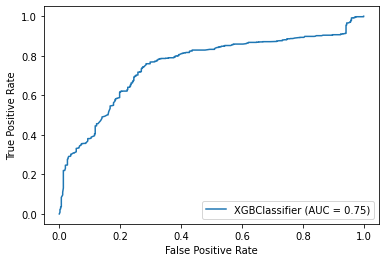

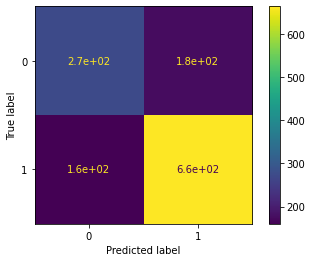

In [78]:
y5 = xgb.predict(X1_test)
print("Accuracy: ", accuracy_score(y1_test,y5))
print("Confusion Matrix: ")
print(confusion_matrix(y1_test,y5))
print("F1 Score: ", f1_score(y1_test,y5))
print("ROC-AUC score: ", roc_auc_score(y1_test,y5))
print("")
plot_roc_curve(xgb, X1_test, y1_test)
plot_confusion_matrix(xgb, X1_test, y1_test)   
plt.show() 